In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn. tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

std_scale = StandardScaler()

In [357]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv")

In [358]:
data.shape

(1000, 17)

In [359]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [360]:
data.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
438,< 0 DM,42,critical,renovations,3394,< 100 DM,unemployed,4,4,65,none,own,2,unemployed,1,no,no
514,unknown,24,good,car,2255,unknown,< 1 year,4,1,54,none,own,1,skilled,1,no,no
326,unknown,12,critical,furniture/appliances,5801,unknown,> 7 years,2,4,49,none,rent,1,skilled,1,yes,no
121,unknown,24,critical,car,3868,< 100 DM,> 7 years,4,2,41,none,rent,2,management,1,yes,no
971,unknown,24,good,car,7393,< 100 DM,1 - 4 years,1,4,43,none,own,1,unskilled,2,no,no
235,< 0 DM,24,good,furniture/appliances,1823,< 100 DM,unemployed,4,2,30,store,own,1,management,2,no,yes
750,< 0 DM,6,good,furniture/appliances,428,< 100 DM,> 7 years,2,1,49,bank,own,1,skilled,1,yes,no
741,1 - 200 DM,10,very good,furniture/appliances,1048,< 100 DM,1 - 4 years,4,4,23,store,own,1,unskilled,1,no,no
157,< 0 DM,12,very good,education,339,< 100 DM,> 7 years,4,1,45,bank,own,1,unskilled,1,no,no
392,< 0 DM,36,good,car,3249,< 100 DM,4 - 7 years,2,4,39,bank,other,1,management,2,yes,no


In [361]:
data.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [362]:
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [363]:
data = data.drop(['checking_balance','purpose','savings_balance','employment_duration','phone','percent_of_income','years_at_residence'],axis =1)

In [364]:
data

,months_loan_duration,credit_history,amount,age,other_credit,housing,existing_loans_count,job,dependents,default
0,6,critical,1169,67,none,own,2,skilled,1,no
1,48,good,5951,22,none,own,1,skilled,1,yes
2,12,critical,2096,49,none,own,1,unskilled,2,no
3,42,good,7882,45,none,other,1,skilled,2,no
4,24,poor,4870,53,none,other,2,skilled,2,yes
...,...,...,...,...,...,...,...,...,...,...
995,12,good,1736,31,none,own,1,unskilled,1,no
996,30,good,3857,40,none,own,1,management,1,no
997,12,good,804,38,none,own,1,skilled,1,no
998,45,good,1845,23,none,other,1,skilled,1,yes


In [365]:
data.dtypes

months_loan_duration     int64
credit_history          object
amount                   int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
default                 object
dtype: object

In [366]:
dummies = pd.get_dummies(data[['credit_history','other_credit','housing','job']])


In [367]:
dummies

,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
996,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
997,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
998,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [368]:
data = data.drop(['credit_history','other_credit','housing','job'],axis =1)

In [369]:
data

,months_loan_duration,amount,age,existing_loans_count,dependents,default
0,6,1169,67,2,1,no
1,48,5951,22,1,1,yes
2,12,2096,49,1,2,no
3,42,7882,45,1,2,no
4,24,4870,53,2,2,yes
...,...,...,...,...,...,...
995,12,1736,31,1,1,no
996,30,3857,40,1,1,no
997,12,804,38,1,1,no
998,45,1845,23,1,1,yes


In [370]:
data['default'] = data['default'].map({'no':0,'yes':1})

In [371]:
data.dtypes

months_loan_duration    int64
amount                  int64
age                     int64
existing_loans_count    int64
dependents              int64
default                 int64
dtype: object

In [372]:
data

,months_loan_duration,amount,age,existing_loans_count,dependents,default
0,6,1169,67,2,1,0
1,48,5951,22,1,1,1
2,12,2096,49,1,2,0
3,42,7882,45,1,2,0
4,24,4870,53,2,2,1
...,...,...,...,...,...,...
995,12,1736,31,1,1,0
996,30,3857,40,1,1,0
997,12,804,38,1,1,0
998,45,1845,23,1,1,1


In [373]:
credit = pd.concat([data,dummies],axis =1)

In [374]:
credit

,months_loan_duration,amount,age,existing_loans_count,dependents,default,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,6,1169,67,2,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,48,5951,22,1,1,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12,2096,49,1,2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,42,7882,45,1,2,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,24,4870,53,2,2,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,31,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
996,30,3857,40,1,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
997,12,804,38,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
998,45,1845,23,1,1,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

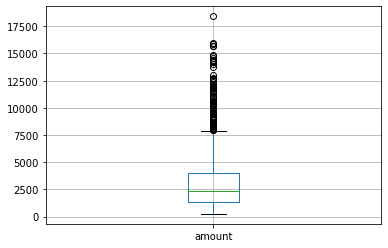

In [375]:
credit.boxplot(column=['amount'])
plt.show

In [376]:
x=credit.drop(['default'],axis=1)
y = credit[['default']]

In [377]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.74,random_state=1)

In [378]:
reg_model= LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [379]:
reg_model.score(x_train,y_train)

0.18371857394500446

In [380]:
reg_model.score(x_test,y_test)

0.010060127403547336

In [381]:
poly = PolynomialFeatures(degree=2)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)

print(poly_clf.score(x_train2,y_train))

0.4851951083842817


In [382]:
poly = PolynomialFeatures(degree=1,interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)

print(poly_clf.score(x_test2,y_test))

0.010060127403548114


In [383]:
dtree=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [384]:
dtree.score(x_train,y_train)

0.7807692307692308

In [385]:
dtree.score(x_test,y_test)

0.6959459459459459

In [386]:
from sklearn import metrics

In [387]:
y_predict = dtree.predict(x_test)

<AxesSubplot:>

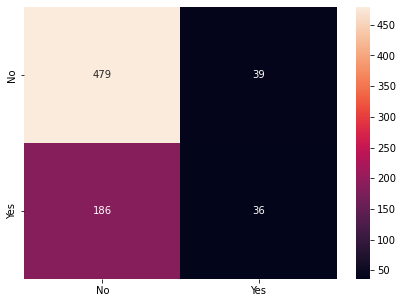

In [388]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [389]:
from sklearn.ensemble import RandomForestClassifier
rfcl =  RandomForestClassifier(n_estimators=12,random_state=1)
rfcltr =  rfcl.fit(x_train,y_train)
rfclte =  rfcl.fit(x_test,y_test)
rfcltr.score(x_test,y_test)

C:\Users\panda\AppData\Local\Temp\ipykernel_9348\2335230230.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcltr =  rfcl.fit(x_train,y_train)
C:\Users\panda\AppData\Local\Temp\ipykernel_9348\2335230230.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclte =  rfcl.fit(x_test,y_test)


0.9864864864864865

In [390]:
rfclte.score(x_train,y_train)

0.7153846153846154

In [391]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dtree,random_state=1)
bgcl = bgcl.fit(x_train,y_train)
y_predict = bgcl.predict(x_test)
bgcl.score(x_test,y_test)

C:\Users\panda\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6864864864864865

<AxesSubplot:>

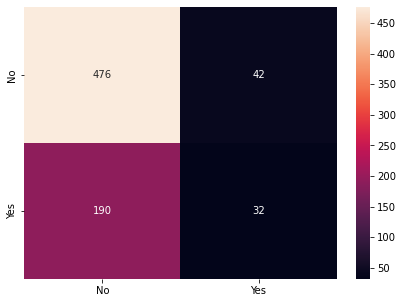

In [392]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [393]:
from sklearn.ensemble import AdaBoostClassifier
abcl =  AdaBoostClassifier(n_estimators=10,random_state=2)
abcl =  abcl.fit(x_train,y_train)
abcl.score(x_test,y_test)

C:\Users\panda\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6797297297297298

In [394]:
abcl.score(x_train,y_train)

0.7538461538461538

In [395]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl =  GradientBoostingClassifier(n_estimators=10,random_state=1)
gbcl =  gbcl.fit(x_train,y_train)
y_predict = gbcl.predict(x_test)
gbcl.score(x_test,y_test)

C:\Users\panda\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7027027027027027

In [396]:
gbcl.score(x_train,y_train)

0.7730769230769231

<AxesSubplot:>

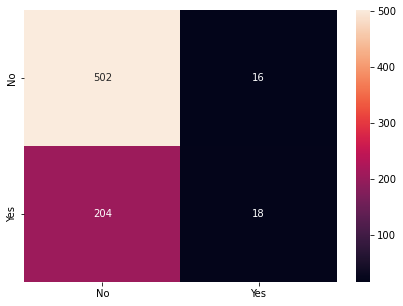

In [397]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [398]:
from sklearn.ensemble import RandomForestClassifier
rfcl =  RandomForestClassifier(n_estimators=12,random_state=3)
rfcl =  rfcl.fit(x_train,y_train)
rfcl.score(x_test,y_test)

C:\Users\panda\AppData\Local\Temp\ipykernel_9348\2890416210.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl =  rfcl.fit(x_train,y_train)


0.6932432432432433

In [399]:
rfcl.score(x_train,y_train)

0.9923076923076923

0.6932432432432433


<AxesSubplot:>

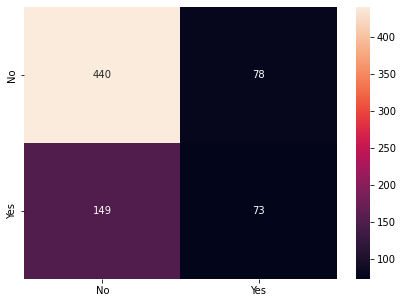

In [400]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')